## Dimensionality Reduction with PCA: Iris Dataset Demo

This notebook demonstrates PCA for dimensionality reduction using the classic Iris dataset.

In [1]:
%pip install scikit-learn matplotlib numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import libraries
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

### PCA: 4D → 2D Projection
We'll reduce the 4-dimensional data to 2 principal components while preserving maximum variance.

In [3]:
# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target
species_names = iris.target_names

print("Original data shape:", X.shape)
print("Features:", iris.feature_names)
print("Target classes:", species_names)

Original data shape: (150, 4)
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target classes: ['setosa' 'versicolor' 'virginica']


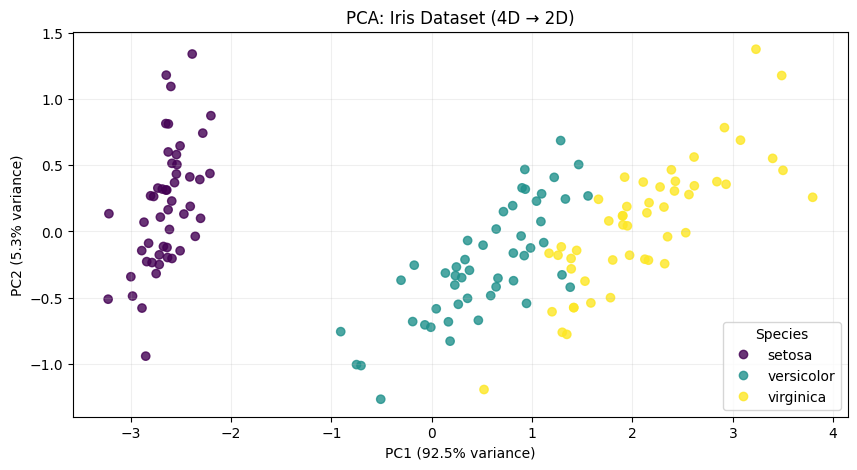

Variance retained in 2D: 97.8%


In [4]:
# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot results
plt.figure(figsize=(10, 5))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.8)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)")
plt.title("PCA: Iris Dataset (4D → 2D)")
plt.legend(handles=scatter.legend_elements()[0], 
           labels=species_names.tolist(),
           title="Species")
plt.grid(True, alpha=0.2)
plt.savefig("../images/pca/4D_to_2D.png", dpi=300, bbox_inches='tight')
plt.show()

print(f"Variance retained in 2D: {sum(pca.explained_variance_ratio_):.1%}")

### Individual Principal Component Analysis
Let's examine how each principal component separates the data.

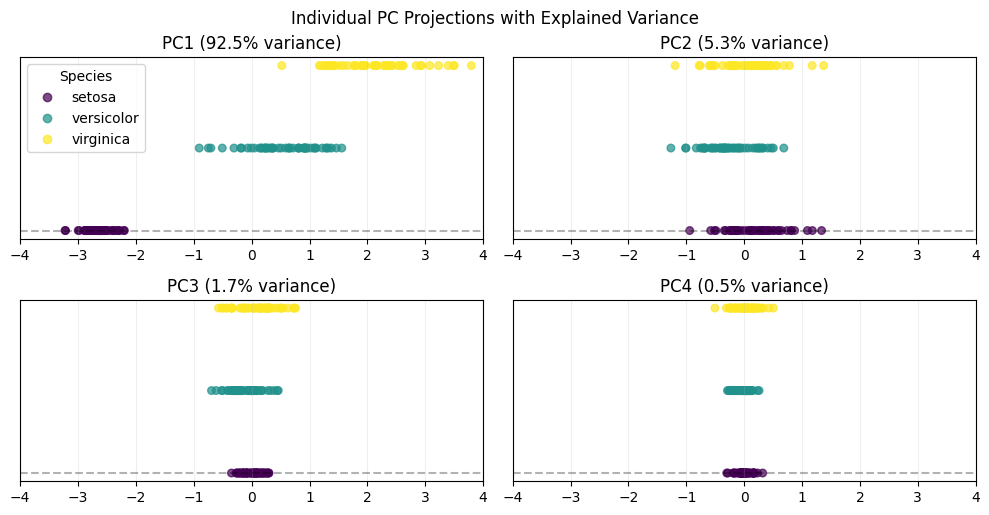

Variance explained per component:
PC1: 92.5%
PC2: 5.3%
PC3: 1.7%
PC4: 0.5%


In [5]:
# Full PCA with all components
pca_full = PCA(n_components=4)
X_pca_full = pca_full.fit_transform(X)

# Create subplots
plt.figure(figsize=(10, 5))
for i in range(4):
    plt.subplot(2, 2, i+1)
    scatter = plt.scatter(X_pca_full[:, i], np.zeros(len(X_pca_full)) + 0.1*y,
                         c=y, cmap='viridis', alpha=0.7, s=30)
    plt.axhline(0, color='black', linestyle='--', alpha=0.3)
    plt.title(f"PC{i+1} ({pca_full.explained_variance_ratio_[i]:.1%} variance)")
    plt.yticks([])
    plt.xlim(-4, 4)
    plt.grid(True, alpha=0.2)
    if i == 0:  # Add legend only once
        plt.legend(handles=scatter.legend_elements()[0],
                  labels=species_names.tolist(),
                  title="Species")

plt.tight_layout()
plt.suptitle("Individual PC Projections with Explained Variance", y=1.02)
plt.savefig("../images/pca/components.png", dpi=300, bbox_inches='tight')
plt.show()

# Print variance explained
print("Variance explained per component:")
for i, ratio in enumerate(pca_full.explained_variance_ratio_):
    print(f"PC{i+1}: {ratio:.1%}")

### Key Observations:
- PC1 captures 92.5% of the variance

- PC1 alone provides good class separation

- Higher PCs contribute minimal additional information

- 2D PCA retains 97.8% of total variance

## Cumulative Variance Visualization
 We will calculate and visualize the cumulative variance explained by the principal components on a synthetic dataset with 100 features, and identify the number of components needed to retain 80%, 90%, and 95% of the total variance.


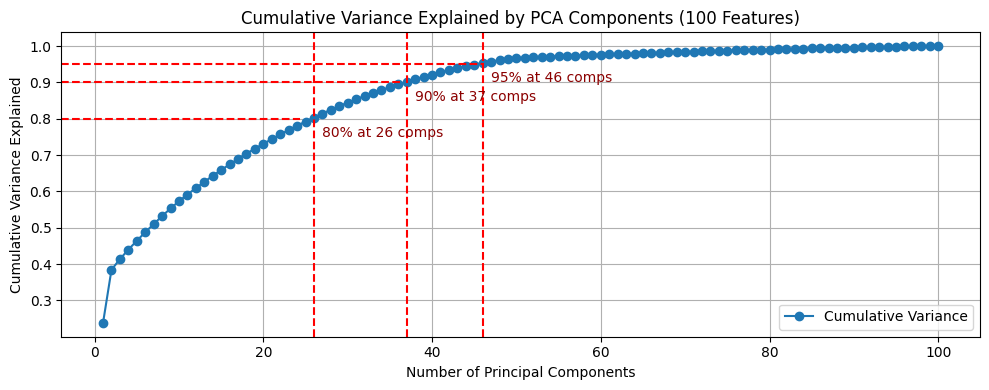

In [6]:
from sklearn.datasets import make_classification

# Generate a synthetic dataset with 100 features
X, _ = make_classification(n_samples=1000, n_features=100, n_informative=50, random_state=42)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Calculate cumulative variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components required for 80%, 90%, and 95% variance
cutoffs = {}
for threshold in [0.80, 0.90, 0.95]:
    n_components = np.argmax(cumulative_variance >= threshold) + 1
    cutoffs[threshold] = n_components

# Plot cumulative variance
plt.figure(figsize=(10, 4))
plt.plot(np.arange(1, 101), cumulative_variance, marker='o', label='Cumulative Variance')
for threshold, n_components in cutoffs.items():
    plt.axhline(y=threshold, color='r', linestyle='--', xmax=n_components/100)
    plt.axvline(x=n_components, color='r', linestyle='--')
    plt.text(n_components + 1, threshold - 0.05, f'{int(threshold*100)}% at {n_components} comps', color='#8B0000')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained by PCA Components (100 Features)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("../images/pca/cumulative_variance.png", dpi=300, bbox_inches='tight')
plt.show()


### Key Observation

From the plot above, we observe the number of components required to capture various levels of variance:

- **80% variance**: 26 components (26% of original storage)
- **90% variance**: 37 components (37% of original storage)
- **95% variance**: 46 components (46% of original storage)

This highlights the efficiency of PCA in reducing dimensionality. Even at 95% variance retention, we can reduce the dataset to less than half its original size while preserving most of the information.


## Image Compression with PCA
In this section, we will apply PCA to compress an image. We can achieve significant compression while retaining visual quality. For example, we can reduce a 561x561 image to just 61 principal components, achieving a compression ratio of ~ 5:1.

Image shape: (561, 561, 3)


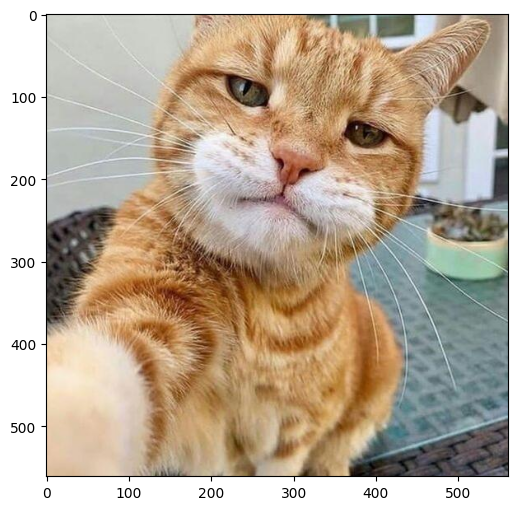

In [31]:
# Load the image of the rizzler selfie captured by the rizzler cat
from matplotlib.image import imread

image_raw = imread("./selfie.jpg")
print("Image shape:", image_raw.shape)

plt.figure(figsize=(6, 6))
plt.imshow(image_raw)
plt.savefig('../images/pca/origCat.png', dpi=300, bbox_inches='tight')

(561, 561)
1.0


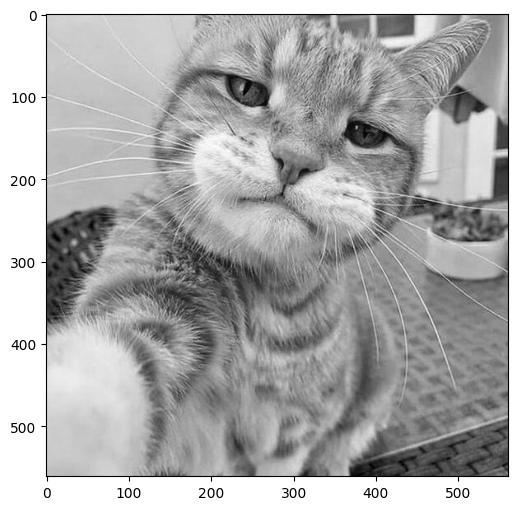

In [30]:
# Grayscale conversion by summing RGB channels to reduce the rizzler's charm and our eyes can handle it.

image_sum = image_raw.sum(axis=2)
print(image_sum.shape)

image_bw = image_sum/image_sum.max()
print(image_bw.max())

plt.figure(figsize=(6,6))
plt.imshow(image_bw, cmap=plt.cm.gray)
plt.savefig('../images/pca/origCat_gray.png', dpi=300, bbox_inches='tight')

Number of components explaining 95% variance: 61


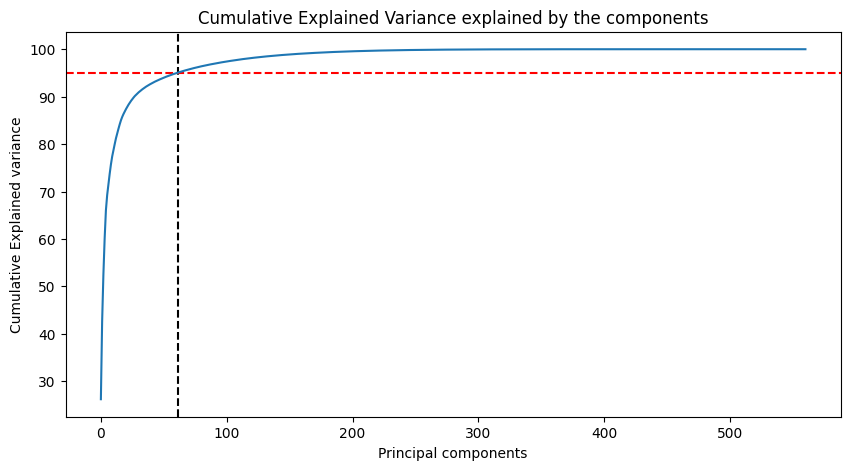

In [23]:
from sklearn.decomposition import PCA, IncrementalPCA
pca = PCA()
pca.fit(image_bw)

# Getting the cumulative variance

var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

# How many PCs explain 95% of the variance?
k = np.argmax(var_cumu>95)
print("Number of components explaining 95% variance: "+ str(k))
#print("\n")

plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by the components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
ax = plt.plot(var_cumu)

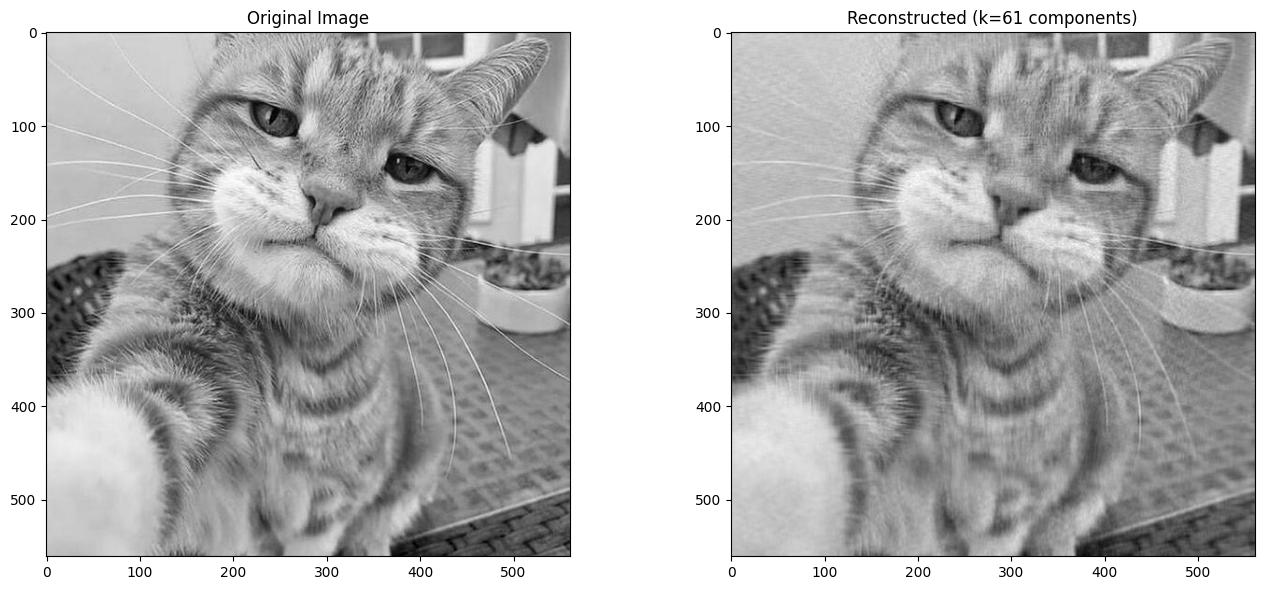

In [32]:
ipca = IncrementalPCA(n_components=k)
image_recon = ipca.inverse_transform(ipca.fit_transform(image_bw))

# Plot original and reconstructed images side by side
plt.figure(figsize=(14, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image_bw, cmap=plt.cm.gray)
plt.title("Original Image")

# Reconstructed image
plt.subplot(1, 2, 2)
plt.imshow(image_recon, cmap=plt.cm.gray)
plt.title(f"Reconstructed (k={k} components)")

plt.tight_layout()
plt.savefig('../images/pca/reconstructed_cat.png', dpi=300, bbox_inches='tight')
plt.show()

We only need to store 61 components for retaining 95 percent variance.

Let the original grayscale image be a matrix:

$$
\mathbf{I} \in \mathbb{R}^{561 \times 561}
$$

We first compute the mean vector of the rows:

$$
\boldsymbol{\mu} = \frac{1}{561} \sum_{i=1}^{561} \mathbf{I}_i
$$

Center the data by subtracting the mean:

$$
\mathbf{X}_i = \mathbf{I}_i - \boldsymbol{\mu}
$$

---

### PCA Decomposition (Projection)

Let 

$$
\mathbf{P} \in \mathbb{R}^{561 \times 61}
$$

be the matrix whose **columns** are the top-61 eigenvectors.

Project the centered data onto the principal components by:

$$
\mathbf{C} = \mathbf{X} \mathbf{P}, \quad \mathbf{C} \in \mathbb{R}^{561 \times 61}
$$

---

### Reconstruction Formula

The approximate reconstruction of the original image is:

$$
\hat{\mathbf{I}} = \mathbf{C} \mathbf{P}^\top + \boldsymbol{\mu}
$$

where the mean vector \(\boldsymbol{\mu}\) is broadcasted and added to each row.

---

### Storage Requirement

To reconstruct the image, we store:

- Mean vector: $$\boldsymbol{\mu} \in \mathbb{R}^{561}$$  
- Principal components (eigenvectors as columns): $$\mathbf{P} \in \mathbb{R}^{561 \times 61}$$  
- Compressed coefficients: $$\mathbf{C} \in \mathbb{R}^{561 \times 61}$$  

The total number of values stored:

$$
561 + (561 \times 61) + (561 \times 61) = 561 + 34,221 + 34,221 = 68,943
$$

Original number of values:

$$
561 \times 561 = 314,721
$$

---

### Compression Ratio

$$
\boxed{
\text{Compression Ratio} = \frac{314,721}{68,943} \approx 4.56:1
}
$$

Thus, we achieve approximately **4.56× compression** while retaining 95% of the image variance.


### Key Observations
- **Compression Ratio**: The original image is reduced to ~ 20% of its original size.
- **Visual Quality**: The compressed image retains most of the original features, demonstrating PCA's effectiveness in image compression.

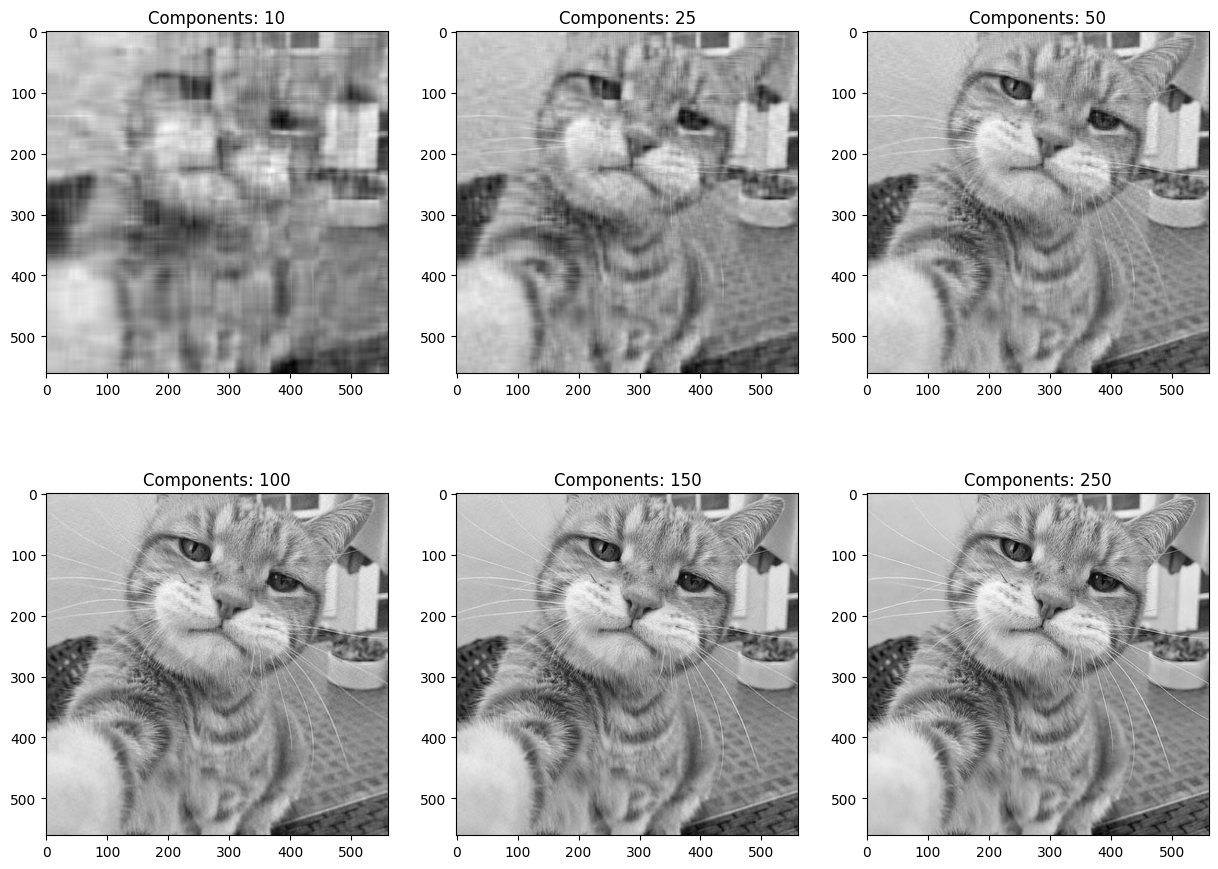

In [33]:
# Function to reconstruct and plot image for a given number of components

def plot_at_k(k):
    ipca = IncrementalPCA(n_components=k)
    image_recon = ipca.inverse_transform(ipca.fit_transform(image_bw))
    plt.imshow(image_recon,cmap = plt.cm.gray)
    
ks = [10, 25, 50, 100, 150, 250]

plt.figure(figsize=[15,12])

for i in range(6):
    plt.subplot(2,3,i+1)
    plot_at_k(ks[i])
    plt.title("Components: "+str(ks[i]))

plt.subplots_adjust(wspace=0.2, hspace=0.0)
plt.savefig('../images/pca/reconstructed_cat_grid.png', dpi=300, bbox_inches='tight')
plt.show()

Well looks like after 100, most of the reconstructed images are indistinguishable from the original greyscale. Even with just 61 components, the image quality remains high, showcasing PCA's ability to compress data while preserving essential features.

Now, PCA is not the only dimensionality reduction technique - there are plenty of others. Notable ones include:
- **t-SNE**: Effective for visualizing high-dimensional data in 2D or 3D, especially for clustering.
- **UMAP**: Similar to t-SNE but often faster and better at preserving global structure.
- **LDA (Linear Discriminant Analysis)**: Focuses on maximizing class separability, often used for classification tasks.
### Conclusion
PCA is a powerful technique for dimensionality reduction, effective in various applications such as data visualization, noise reduction, and image compression. It allows us to retain most of the variance in the data while significantly reducing its dimensionality, making it easier to analyze and visualize complex datasets.